<a href="https://colab.research.google.com/github/anacrm00/Test/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PROJECT**

# Description
In this little project, we are going to implement a spam classification method, that is we will assign a lable to each input email as *spam* or *ham* (non-spam)


# The data
The date used contain a set of emails described by a set of features (the data has already been processed and the features computed)

The data is stored as a 'npz' file (we show how to retrieve it bellow)

The file contains:
  - training data, with labels
  - test data without the lables


# To get the data

1. First you have to download the file spam_project.npz in your loacl repository
  - If you uyse jupiter notebook, you can add the file in your current working directory
  - If you use google colab, you have to add the file to your Google drive 

2. Then you can load the file and access the data

I will describe here the loading procedure for Google colab

In [39]:
# Opening the data file
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import KFold


# First you have mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [40]:
# Indicate the path to the file
gdrive_path = '/content/gdrive/My Drive/SML_Project/' ## <-- THIS IS MY PATH, SO EDIT 
# load the spam file
data = np.load(gdrive_path +'spam_project.npz')

In [41]:
# Now we can acess the data
# NOTE: data is saved as a dictionary, so we need the keys to acces the different arrays
data.files

['training_data', 'training_labels', 'testing_data']

As we can see, from above output, we have 3 keys (meaning 3 arrays) in the variable data: 'training_data', 'training_labels' and 'testing_data'

Let's have a look at the training data

In [42]:
train_data = data['training_data']
print(train_data.shape)

(3127, 32)


We see that we have 3172 training example, describe by 32 features

In [43]:
train_labels = data['training_labels']
print(train_labels.shape)

(3127, 1)


In [44]:
test_data = data['testing_data']
print(test_data.shape)

(1042, 32)


Silmilarly, we see that we have 3172 training labels. The labels are :
  - 1 for a spam
  - 0 for a ham

### **WHAT YOU HAVE TO D0**

This is a binary classification problem and we will try the following:
1. Apply PCA to reduce the dimensionality of the features to 2
  - Pick frist 2 principal components
  - Plot the data in this 2D space (different color for different class)
  - Apply k-means to the projected data (2D-space)
    - NOTE: Data in the same class, must belong to the same cluster
    - So, it is a good idea to apply k-means to each class separately
      - For example, if k=2, we will have 2 cluster centers for the spam class and 2 cluster centers for the ham class
    - For a sample to classifiy, we find the nearest cluster center among all clusters, and assign the corresponding label
    - NOTE: divide the training data into training and validation and use the validation data to set the best value for k
    - Show your traing and validation accuracies (can plot it as curves)
  - Compute the training accuracy and report it (for the best value for k)

2. Comments?
  - Is projecting to 2D is good idea? why?
  - Apply PCA again, but this time select the number of principal components so that 95% of the data variance is preserved.
  - Apply k-means again to the projected data
  - Compute the training accuracy
  - Conclusion?

3. Testing
  - Apply your best classifier to the test data
    - You must provide the results (the predicted labels) for the test data as a separate file to to submitted with your work



4. **OPTIONAL**:
  - Use GMM (Gaussian Mixture Model) for classification
    - Fit a GMM to the training data (must try different values of K, the number of Gaussians)
      - NOTE: divide the training data into training and validation and use the validation data to set the best value for K
      - For a given sample, compute the distances to the Gaussians, and assign the label of the closest one (use Mahalanobis distance here)
    - Apply your classifier to the test data
      - You must provide the results (the predicted lables) for the thest data as a separate file to to submitted with your work
  


### **WHAT TO SUBMIT**
- Your notebook containing the code, the plots and as much comments as needed
- A file containing the predicted lables for the test data
- Submit a zipped folder named as follows on ecampus:

'SURNAME_NAME.ZIP'

#Importing our k-means function

In [45]:
def my_kmeans(X, k, c = []):

#__________________________________________________________________________________________________    
    # X is the input data matrix of size K x d, where N is the number of points
    # k is the number of clusters
    #c are the initial centers if given
    # returns the k cluster centers
#__________________________________________________________________________________________________
    
    #################################
    #         Initialization        #
    #################################

    # > Initial guess for the centers of the clusters
    #______________________________________________________________
    
    #Getting the dimensions of X
    N, d = X.shape
    
    #Getting the minimum and maximum value of each dimension of X to initialize 
    #the centers of the clusters
    for i in range(d):

        min_val = np.min(X[:,i]) 
        max_val = np.max(X[:,i])
    
    #In the case initial centers are not given, we assign them randomly   
    if len(c) == 0:
      
      #Initializing centers to zero
      centers = np.zeros([k,d])

      #Randomly initializing the centers 
      for j in range(k):
          centers[j,i] = np.random.rand()*(max_val - min_val) + min_val 
    else:
      centers = c


   #######################################
   #         K-means algorithm.          #
   #######################################
   
    #Initializing variables
    maxIter = 1000; #Maximum iterations allowed 
    epsilon = 10e-6; #Threshold to verify for convergence
    t = 0; #Iterations count
    distance = np.zeros([N,k]); #initializing array to store distance from data points to cluster centers.
    J = 10e6; #Distorsion to verify for convergence. Set to a big number initially and later minimized.
    converge =1; #Binary variable to define convergence. 
    
    while (converge!=0) and (t<=maxIter):
      
      r = np.zeros([N,k]); #Initialize matrix to store binary variable (r)
      #r = 1 if the point is in the cluster k
      #r = 0, otherwise
      
      #_______________________________________________________________
      
      ###############################################################
      # Assignment: Assign points to nearest cluster center.        #
      # Each point is assigned to the center that it is closest to. #
      ###############################################################

      for i in range(N):
        for j in range(k):

          #Computing the Euclidean distance from each point to each cluster center
          distance[i,j] = np.sum(np.power(X[i,:] - centers[j,:],2) )
        
        #Finding the cluster center that is closest to the point  
        idx = np.argmin(distance[i,:])

        #Assign the point to that cluster
        r[i,idx] = 1

      #_______________________________________________________________
      
      ####################################################################
      #             Refining: reset the cluster centers.                 #
      ####################################################################
      
      for i in range(k):
        for j in range(d):
          #Set cluster center as the weighted mean of points in the cluster
          if np.sum(r[:,i]) != 0:
            centers[i,j] = np.sum(r[:,i] @ X[:,j])/np.sum(r[:,i])
          else:
            centers[i,j] = np.random.rand()*(max_val - min_val) + min_val 
      t+=1
      
      #_______________________________________________________________
      
      ####################################################################
      #             Convergence: checking for convergence                #
      ####################################################################

      new_J = np.sum(r @ distance.T)
      if ((abs(new_J-J)/abs(J))<=epsilon) or (t>=maxIter):
         converge = 1
  

    return centers,t,r

#Creating classifier function

This function will allow us to assign labels to the testing data. It will take as input the test set and the ham and spam cluster centers.

It calculates the Euclidean distance from each test sample to all cluster centers, and assigns it to the closest center. 

It outputs the labels of all test samples, '1' for spam, '0 for ham.

In [112]:
def classification(X,ham_centers,spam_centers):

#__________________________________________________________________________________________________
  #X is the data to classify. Array of dimensions Nxd
  #ham_centers is a kxd array containing the centers of the ham clusters, obtained from training.
  #spam_centers is a kxd array containing the centers of the ham clusters, obtained from training.
  #Returns cluster assignments and predicted labels.
#__________________________________________________________________________________________________

  #Get dimensions of testing data
  N,d = X.shape

  #Stack ham and spam cluster centers
  centers = np.vstack((ham_centers,spam_centers))

  #Get centers dimensions 
  k,c = centers.shape

  #Initialize distance array with zeros
  distance = np.zeros([N,k])

  #Initialize cluster assignment array with zeros
  r = np.zeros([N,k])

  #Initialize predicted labels array with zeros
  predicted_labels = np.zeros([N,1])
  
  for i in range(N):
        for j in range(k):

          #Computing the Euclidean distance from each point to each cluster center
          distance[i,j] = np.sum(np.power(X[i,:] - centers[j,:],2) )
        
        #Finding the cluster center that is closest to the point  
        idx = np.argmin(distance[i,:])

        #Assign the point to that cluster
        r[i,idx] = 1

        #Classify as spam or ham
        if idx > k/2:
          predicted_labels[i] = 1

  return r, predicted_labels

#Creating a helper function

This function will allow us to initialize centers selected at random from the data. 
It will take as input the data set and the number of centers we want to select.

In [47]:
def select_k_centers(X, k):
    
    # Generating k random indices without replacement
    random_indices = np.random.choice(len(X), k, replace=False)

    # Selecting the data points corresponding to the random indices
    selected_centers = X[random_indices]

    return selected_centers

#Creating best k estimation function

We create a function that finds the best k by using cross validation.

It is divided into several steps:

We select k, the number of clusters and for each:

1. We split the training data into ***g*** groups, which will be used for cross validation.

2. Select one group for validation, and the rest for training.

3. Split in the same manner the labels, into training and validation labels. 

4. Initialize the center to perform k-means. We use a previously created helper function to choose points at random from the training set and use them as initial centers in the k-means function. 

5. Apply k-means to the training set and find the ***k*** cluster centers for each class (spam and ham).

6. Classification. We use a previusoly created classifier function, which will assign each sample from the training and validation set to one of the clusters defined in the previous step. 

7. Accuracy calculation. We calculate the training and validation accuraces, by comparing the assigned labels to the labels given with the training data. This value is stored to later compute their average, which will be the accuracy for the current value of k, which is also stored. 

After repeating all these steps for all k, we select the best k, by choosing the k for which the accuracy was highest. 

Finally, we plot the accuracies for each k.

The function returns the best k, within the range evaluated. 


In [89]:
def best_k_estimation(X,g,K,labels):
#__________________________________________________________________________________________________  
  #X is the data set 
  #g is the number of groups the data will be divided into
  #k is the maximum number of clusters to 
  #labels is the training labels given with the training set
  #Returns the best k according to the accuracy. Plots the accuracy corresponding to k 
#__________________________________________________________________________________________________  

  k_train_accuracies = []
  k_val_accuracies = []

  #Performing k-means for k from 2 to 10
  for k in range(1,K):

    #Initializing sum of training accuracies to average later
    train_accuracy = 0 
    sum_train = 0
    #Initializing sum of validation accuracies to average later
    val_accuracy = 0 
    sum_val = 0


  ###########################################
  # Splitting the training data into train  #
  #           and validation set            #
  ###########################################
    split_iteration = 0
    kf = KFold(n_splits=g, random_state=42, shuffle=True)

    for train_index, val_index in kf.split(X):
      
      # Getting the training and validation sets for the current fold
      train_X, val_X = X[train_index], X[val_index]


      #Getting the ham and spam labels
      train_label = labels[train_index]
      train_ham_labels = np.where(train_label==1)
      train_spam_labels = np.where(train_label==1)

      val_label = labels[val_index]
      val_ham_labels = np.where(val_label==0)
      val_spam_labels = np.where(val_label==1)

      #Getting the ham and spam training data 
      train_ham = train_X[train_ham_labels[0]]
      train_spam = train_X[train_spam_labels[0]]
      


  ###########################################
  #        Initializing the centers         #
  ###########################################

      #Initializing the centers
      k_ham_initial_centers = select_k_centers(train_ham,k)
      k_spam_initial_centers = select_k_centers(train_spam,k)
      

  ###########################################
  #           Performing k-means            #
  ###########################################

      #Performing k-means on ham training set 
      k_ham_centers, t, ham_assignments = my_kmeans(train_ham,k,k_ham_initial_centers)

      #Performing k-means on spam training set
      k_spam_centers, t, spam_assignments = my_kmeans(train_spam,k,k_spam_initial_centers)

  ###########################################
  #             Classification              #
  ###########################################

      #Classifying the train set into the centers found by kmeans
      train_assignment, train_classification = classification(train_X,k_ham_centers,k_spam_centers)

      #Classifying the validation set data into the centers found by kmeans
      validation_assignment, validation_classification = classification(val_X,k_ham_centers,k_spam_centers)

  ###########################################
  #          Accuracy calculation           #
  #            for current split            #
  ###########################################

      #Computing the correctly predicted labels in the training set 
      #Initializing sum of correct train predictions
      correct_train_predictions = 0

      for i in range(len(train_X)):
        if train_classification[i] ==  train_label[i]:
          correct_train_predictions+=1
      train_accuracy = correct_train_predictions/len(train_X)
      sum_train +=train_accuracy



      #Computing the correctly predicted labels in the validation set 
      #Initializing sum of correct validation predictions
      correct_val_predictions = 0
  
      for i in range(len(val_X)):
        if validation_classification[i] == val_label[i]:
          correct_val_predictions+=1
      val_accuracy = correct_val_predictions/len(val_X)
      sum_val += val_accuracy
      
      print(f"k = {k}, Cross validation iteration = {split_iteration}, training accuracy = {train_accuracy}, validation accuracy = {val_accuracy}")
      split_iteration+=1

  ###########################################
  #          Accuracy calculation           #
  #              for current k              #
  ###########################################

    #Computing average of training accuracies for current k 
    k_train_accuracies.append(sum_train/g)

    #Computing average of validation accuracies for current k 
    k_val_accuracies.append(sum_val/g)

  ###########################################
  #            Selecting best k             #
  ###########################################   

  #We select the k for which the validation accuracy is maximum
  best_k = np.argmax(k_val_accuracies) + 1

  ###########################################
  #         Plotting accuracy vs k          #
  ###########################################  
  
  k_values = np.arange(1, K)
  plt.figure()
  plt.plot(k_values,k_val_accuracies)
  plt.title("Validation accuracy vs k")
  plt.xlabel('k')
  plt.ylabel("Validation Accuracy")
  plt.plot(best_k,k_val_accuracies[best_k-1],'o', label = "Best k")
  plt.legend()
  plt.show()

  return best_k

In [85]:
  k_values = np.arange(1, 3)
  print(k_values)

[1 2]


# Developping Principal Component Analysis (PCA)

PCA allows us to project data into a lower dimensional space.  

1. Centering the data

We must center the data as a first step. This means making the mean equal to zero. We do this by the following transformation: 

$$
\tilde{x} \gets x_i - \bar{x}
$$

This way,  $\Sigma \tilde{x_i} = 0$


2. Compute the covariance matrix and its eigenvectors
We compute the sample covariance 

$$
\mathbf{C} = \frac{1}{N}\ \sum_{i = 1}^{N} {x_i}{x_i^T} 
$$
>$\rightarrow \mathbf{C}$ is a ${d x d}$ matrix

Now, we compute eigen-decomposition

$$
\mathbf{C} : \mathbf{C} = \mathbf{U} \wedge \mathbf{U^T}
$$

The eigenvectors $\mathbf{u_1}$ to $\mathbf{u_d}$ are the principal components.

The eigenvalues ${\lambda_1}$ to ${\lambda_d}$ give the importance, in descending order, of each axis. 

>$\rightarrow$ Eigenvalues are not necessarily ordered so we need to sort them from highest to lowest. 

3. Projection into eigenspace

Now we can represent each data point $\mathbf{x_i}$ as:

$$
\mathbf{y_i} = \mathbf{U^T}\mathbf{x_i}
$$

where $\mathbf{U^T}$ is the projection matrix.

In [49]:
def my_PCA(X, k , p ):
  X_pca = 1
#__________________________________________________________________________________________________
  # X is the data set 
  # k is the number of principal components, if specified
  # p is the desired amount of information contained in the k principal components, if specified
  # p is a number between 0 and 1.
    #Specify only k or p. 
    #If specifying k, input p = 0.
    #If specifying p, input k = 0. 
  #Returns sample data projected into eigenspace.
#__________________________________________________________________________________________________

  if k == 0 and p == 0:
    raise TypeError("Must specify k or p")

#############################
#    Centering the data     #
#############################
 
 #Get data dimensions
  N,d = X.shape

  #Initialize mean 
  x_mean = np.zeros(d)

  #Calculate the mean
  for i in range(d):
   x_mean[i] = np.sum(X[:,i])/N

  #Reassign centered xi values
  for i in range(N):
    for j in range(d):
      X[i,j] = X[i,j] - x_mean[j]
  print("data centered")
#__________________________________________________

######################################
#    Computing covariance matrix     #
######################################

  covariance_matrix = np.cov(X,rowvar = False)
  print('covariance matrix calculated')
  
#__________________________________________________

######################################
#        Eigen decomposition         #
######################################

  eigen_vals, eigen_vecs = np.linalg.eig(covariance_matrix)
  print('eigendecomposition')
  
#__________________________________________________

######################################
#            Eigen sorting           #
######################################

#Sorting the eigenvalues and corresponding eigenvector from highest to lowest 
  
  # Make a list of (eigenvalue, eigenvector) tuples
  eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

  # Sort the (eigenvalue, eigenvector) tuples in descending order
  eigen_pairs.sort(key=lambda k: k[0], reverse=True)
  
  #Performing sum of all eigenvalues
  total_eigen_sum = np.sum([eigen_pair[0] for eigen_pair in eigen_pairs])
#__________________________________________________

######################################
#          Eigen selection           #
######################################

  #In the case where the number of principal components was specified
  if k != 0 and p == 0 :
    selected_eigen_vals = [eigen_pair[0] for eigen_pair in eigen_pairs[:k]]
    selected_eigen_vecs = [eigen_pair[1] for eigen_pair in eigen_pairs[:k]]

    k_eigen_sum = np.sum([selected_eigen_vals for selected_eigen_val in selected_eigen_vals])

    #Calculate the percentage of information used when selecting the first k components
    total_info = k_eigen_sum/total_eigen_sum
    print('eigenvalues selected')

  #In the case where the percentage was specified
  if k == 0 and p != 0:
    eigen_sum = 0
    selected_eigen_vecs = []
    f = 0

    for eigen_pair in eigen_pairs:
        eigen_val = eigen_pair[0]
        eigen_vec = eigen_pair[1]
        #selected_eigen_vals.append(eigen_val)
        selected_eigen_vecs.append(eigen_vec)
        eigen_sum += eigen_val
        f += 1
        if eigen_sum / total_eigen_sum >= p:
            break
    print('eigenvalues selected')
  
  #Number of principal components necessary to achieve the specified percentage of information desired
    principal_components = f

#__________________________________________________

######################################
#             Projection             #
######################################


  #Stacking the principal compnent eigenvectors into the projection matrix
  projection_matrix = np.column_stack(selected_eigen_vecs)
  X_pca = X.dot(projection_matrix)
  print('projection done')

  return X_pca 



---



---



---



# Applying PCA 

---

---


# Reducing to two dimensions

We apply the developped PCA function on the training data given. We reduce the dimensionality of the data to two dimensions, originally 32. 

In [50]:
x_pca_2 = my_PCA(train_data,2,0)
print(x_pca_2.shape)

data centered
covariance matrix calculated
eigendecomposition
eigenvalues selected
projection done
(3127, 2)


>Plotting the data into the new 2D space, clustering into spam and ham emails. 

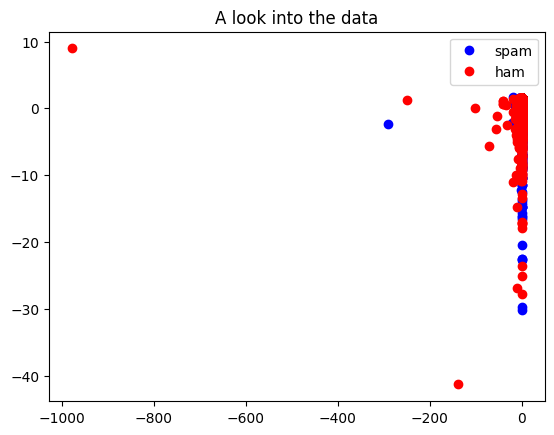

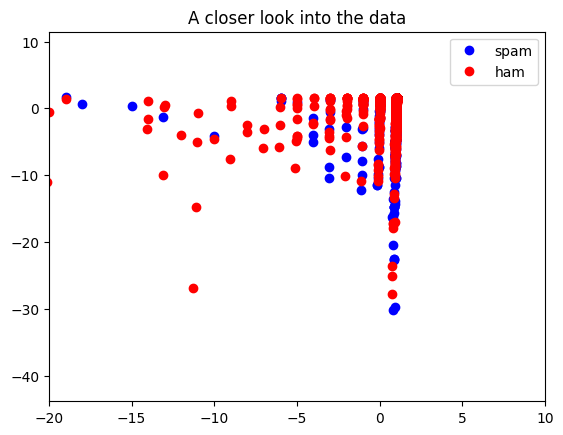

In [51]:
plt.figure()
#Getting the points classified as spam
idx_spam = np.where(train_labels == 1)
plt.plot(x_pca_2[idx_spam[0],0],x_pca_2[idx_spam[0],1],'ob', label = "spam")

#Getting the points classified as ham
idx_ham = np.where(train_labels == 0)
plt.plot(x_pca_2[idx_ham[0],0],x_pca_2[idx_ham[0],1],'or', label = "ham")

plt.title("A look into the data")
plt.legend()


#Taking a closer look into the cluster:

plt.figure()

#Getting the points classified as spam
idx_spam = np.where(train_labels == 1)
plt.plot(x_pca_2[idx_spam[0],0],x_pca_2[idx_spam[0],1],'ob', label = "spam")
plt.xlim([-20,10])

#Getting the points classified as ham
idx_ham = np.where(train_labels == 0)
plt.plot(x_pca_2[idx_ham[0],0],x_pca_2[idx_ham[0],1],'or', label = 'ham')

plt.title("A closer look into the data")
plt.legend()


# Applying k-means to the data projected into two dimensions


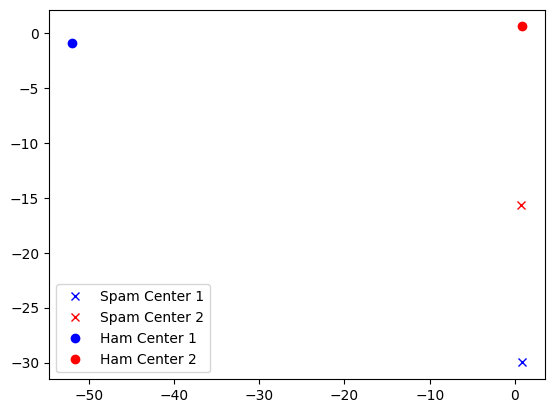

In [102]:
#Applying k-means on the spam and ham classes
k = 5
centers_spam, t, clusters_spam = my_kmeans(x_pca_2[idx_spam[0]],k,[])
centers_ham, t, clusters_ham = my_kmeans(x_pca_2[idx_ham[0]],k,[])

#Plotting the cluster centers
plt.figure()
plt.plot(centers_spam[0,0],centers_spam[0,1],'xb', label = "Spam Center 1")
plt.plot(centers_spam[1,0],centers_spam[1,1], 'xr',label = "Spam Center 2")
plt.plot(centers_ham[0,0],centers_ham[0,1],'ob', label = "Ham Center 1")
plt.plot(centers_ham[1,0],centers_ham[1,1], 'or',label = "Ham Center 2")
plt.legend()

> Visualizing the data belonging to each cluster

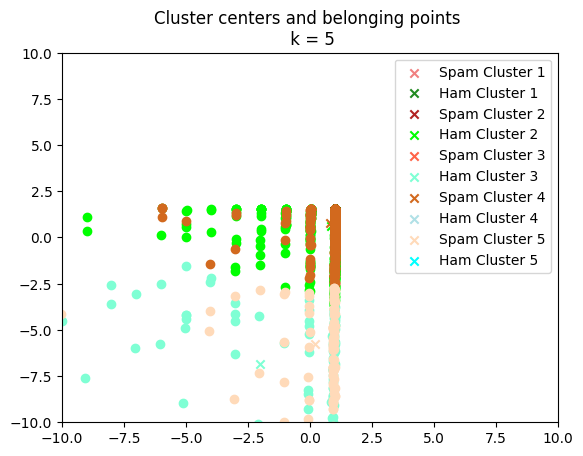

In [103]:
ham_colors = ['forestgreen','lime','aquamarine','powderblue','aqua']
spam_colors = ['lightcoral','firebrick','tomato','chocolate','peachpuff']

plt.figure()

for i in range(k):

  ham_2 = x_pca_2[idx_ham[0]]
  spam_2 = x_pca_2[idx_spam[0]]

  #Grouping the points that belong to each cluster of each class
  spam_cluster = np.where(clusters_spam[:,i] == 1)
  ham_cluster = np.where(clusters_ham[:,i] == 1)

  #Plotting cluster centers
  plt.scatter(centers_spam[i,0],centers_spam[i,1],c = spam_colors[i], marker = 'x', label = "Spam Cluster "+ str(i+1))
  plt.scatter(centers_ham[i,0],centers_ham[i,1],c = ham_colors[i], marker = 'x', label = "Ham Cluster "+ str(i+1))

  #Plotting points in their corresponding cluster
  plt.scatter(spam_2[spam_cluster[0],0],spam_2[spam_cluster[0],1], c = spam_colors[i], marker = 'o')
  plt.scatter(ham_2[ham_cluster[0],0],ham_2[ham_cluster[0],1], c = ham_colors[i], marker = 'o')
  
  plt.legend()
  plt.title("Cluster centers and belonging points \n k = " + str(k))
  plt.xlim([-10,10])
  plt.ylim([-10,10])

#Performing cross-validation to find the best number of clusters 



k = 1, Cross validation iteration = 0, training accuracy = 0.7165133946421431, validation accuracy = 0.6789137380191693
k = 1, Cross validation iteration = 1, training accuracy = 0.7057177129148341, validation accuracy = 0.7220447284345048
k = 1, Cross validation iteration = 2, training accuracy = 0.7082334132693845, validation accuracy = 0.712
k = 1, Cross validation iteration = 3, training accuracy = 0.7090327737809752, validation accuracy = 0.7088
k = 1, Cross validation iteration = 4, training accuracy = 0.7054356514788169, validation accuracy = 0.7232
k = 2, Cross validation iteration = 0, training accuracy = 0.7165133946421431, validation accuracy = 0.6789137380191693
k = 2, Cross validation iteration = 1, training accuracy = 0.7057177129148341, validation accuracy = 0.7220447284345048
k = 2, Cross validation iteration = 2, training accuracy = 0.7082334132693845, validation accuracy = 0.712
k = 2, Cross validation iteration = 3, training accuracy = 0.7090327737809752, validation 

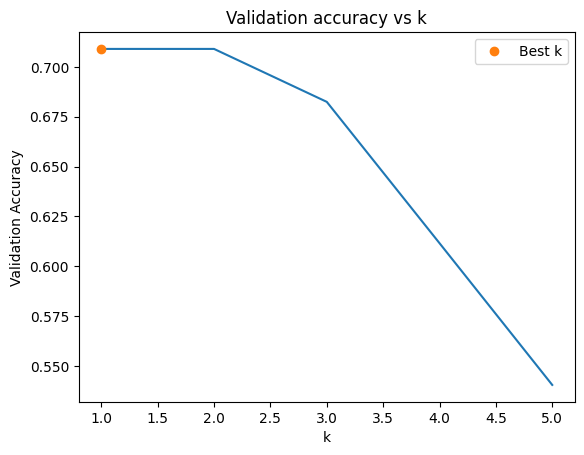

Best k is  1


In [92]:
#Defining number of splits
g = 5
#This allows us to divide the training data into 80% for training and 20% for validation 

#Maximum number of clusters to try
K = 6

#Finding the best k
k = best_k_estimation(x_pca_2,g,K,train_labels)
print("Best k is ",k)

>As shown in the previous plot, the best k for the data reduced into two dimensions is k=1. We obtained a training  accuracy of ~70.9% and a validation accuracy of ~70.9%.



---



---



---



#Reducing dimension to conserve 95% of the data variance

In [22]:
x_pca_95 = my_PCA(train_data,0,0.95)
print(x_pca_95.shape)

data centered
covariance matrix calculated
eigendecomposition
eigenvalues selected
projection done
(3127, 3)


Visualizing the data projected into three dimensions.

Text(0.5, 0.92, 'Training data projected into 3D')

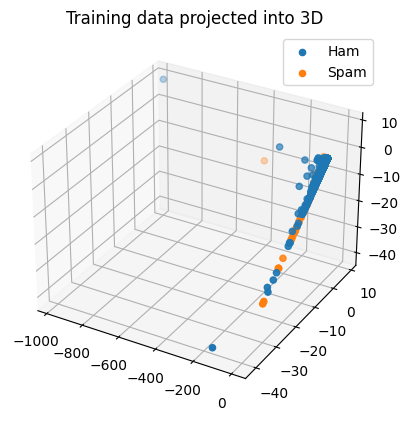

In [107]:
plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x_pca_95[idx_ham[0],0],x_pca_95[idx_ham[0],1],x_pca_95[idx_ham[0],1],'r',label = 'Ham')
ax.scatter3D(x_pca_95[idx_spam[0],0],x_pca_95[idx_spam[0],1],x_pca_95[idx_spam[0],1],'r',label = 'Spam')

plt.legend()
plt.title("Training data projected into 3D")

# Applying k-means to the data projected into 3D

In [23]:
k = 5
centers_spam_95, t, clusters_spam_95 = my_kmeans(x_pca_95[idx_spam[0]],k,[])
centers_ham_95, t, clusters_ham_95 = my_kmeans(x_pca_95[idx_ham[0]],k,[])

>Plotting the clusters

<ipython-input-134-0815f07c3dd6>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(centers_spam_95[i,0],centers_spam_95[i,1],centers_spam_95[i,2],cmap = 'Purples', marker = 'x', label = "Spam Cluster "+ str(i+1))
<ipython-input-134-0815f07c3dd6>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(spam_points[spam_cluster_95[0],0],spam_points[spam_cluster_95[0],1],spam_points[spam_cluster_95[0],2], cmap = 'Purples', marker = 'o')
<ipython-input-134-0815f07c3dd6>:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(centers_ham_95[i,0],centers_ham_95[i,1],centers_ham_95[i,1],cmap = 'Greens', marker = 'x', label = "Ham Cluster "+ str(i+1))
<ipython-input-134-0815f07c3dd6>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(ham_points[ham_cluster_95[0],0],ham_points

<Figure size 640x480 with 0 Axes>

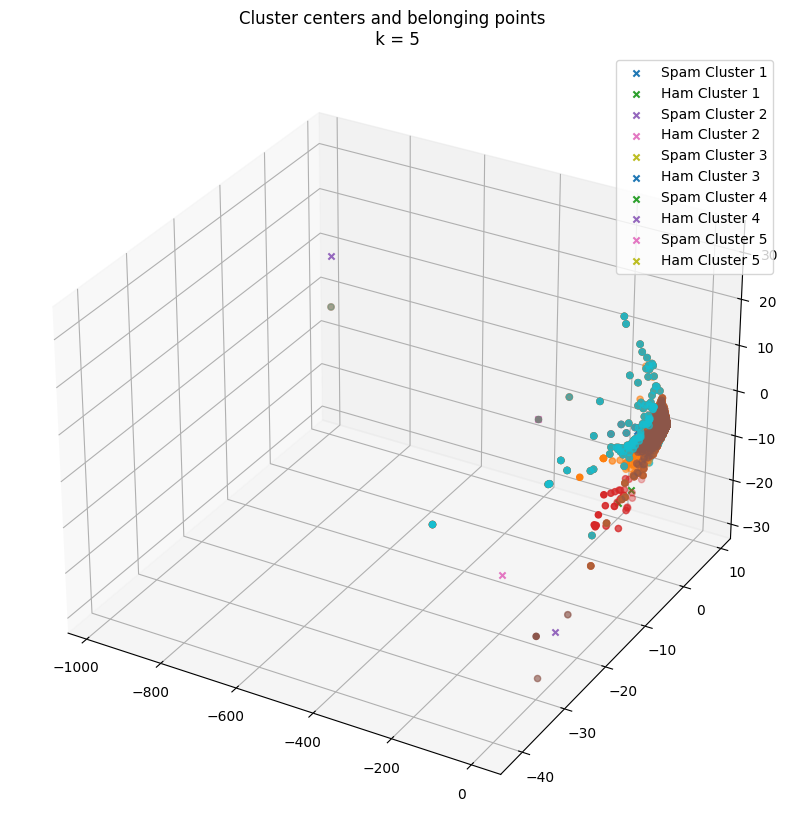

In [134]:
plt.figure()
plt.figure(figsize=(10, 10))
ax = plt.axes(projection = '3d' )

spam_points = x_pca_95[idx_spam[0]]
ham_points = x_pca_95[idx_ham[0]]

for i in range(k):

  #Grouping the points that belong to each cluster of each class
  spam_cluster_95 = np.where(clusters_spam_95[:,i] == 1)
  ham_cluster_95 = np.where(clusters_ham_95[:,i] == 0)

  #Plotting spam cluster centers and points
  ax.scatter3D(centers_spam_95[i,0],centers_spam_95[i,1],centers_spam_95[i,2],cmap = 'Purples', marker = 'x', label = "Spam Cluster "+ str(i+1))
  ax.scatter3D(spam_points[spam_cluster_95[0],0],spam_points[spam_cluster_95[0],1],spam_points[spam_cluster_95[0],2], cmap = 'Purples', marker = 'o')

  #Plotting ham cluster centers and points
  ax.scatter3D(centers_ham_95[i,0],centers_ham_95[i,1],centers_ham_95[i,1],cmap = 'Greens', marker = 'x', label = "Ham Cluster "+ str(i+1))
  ax.scatter3D(ham_points[ham_cluster_95[0],0],ham_points[ham_cluster_95[0],1],ham_points[ham_cluster_95[0],2], cmap = 'Greens', marker = 'o')
  
  plt.legend()
  plt.title("Cluster centers and belonging points \n k = " + str(k))
  #plt.xlim([-10,10])
  #plt.ylim([-15,15])


#Performing cross validation to find best number of clusters

k = 1, Cross validation iteration = 0, training accuracy = 0.7165133946421431, validation accuracy = 0.6789137380191693
k = 1, Cross validation iteration = 1, training accuracy = 0.7057177129148341, validation accuracy = 0.7220447284345048
k = 1, Cross validation iteration = 2, training accuracy = 0.7082334132693845, validation accuracy = 0.712
k = 1, Cross validation iteration = 3, training accuracy = 0.7090327737809752, validation accuracy = 0.7088
k = 1, Cross validation iteration = 4, training accuracy = 0.7054356514788169, validation accuracy = 0.7232
k = 2, Cross validation iteration = 0, training accuracy = 0.7165133946421431, validation accuracy = 0.6789137380191693
k = 2, Cross validation iteration = 1, training accuracy = 0.7057177129148341, validation accuracy = 0.7220447284345048
k = 2, Cross validation iteration = 2, training accuracy = 0.5751398880895284, validation accuracy = 0.5584
k = 2, Cross validation iteration = 3, training accuracy = 0.7090327737809752, validation

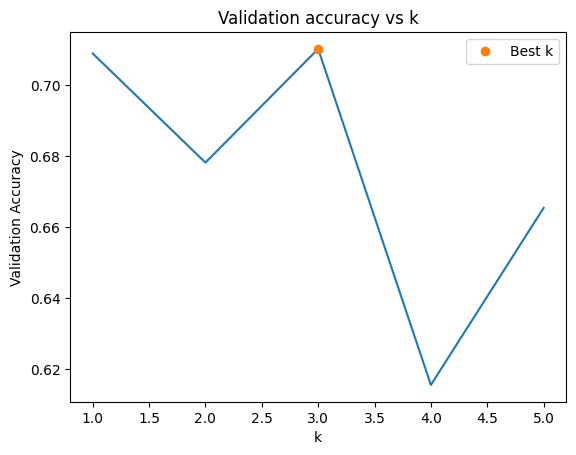

Best k is  3


In [93]:
#Defining number of splits
g = 5
#This allows us to divide the training data into 80% for training and 20% for validation 

#Maximum number of clusters to try
K = 6

#Finding the best k
k = best_k_estimation(x_pca_95,g,K,train_labels)
print("Best k is ",k)



---



---



---



#Predicting labels for the test data

To be able to predict labels for our testing data we must:
1. Apply PCA to the test set, in the same manner it was applied to the training data,

2. Apply k-means to the training data to obtain the cluster centers, the number of clusters is the best k obtained from cross validation. We will use k = 3, and three principal components, because for this values we obtained better validation accuracy 

3. Use our classifier function to assign each test sample to a spam or ham cluster. 

4. Export prediction to npz file

In [119]:
#Step 1
y_pca = my_PCA(test_data,3,0)

#Step 2
best_k = 3

centers_spam_95_final, t, clusters_spam_95_final = my_kmeans(x_pca_95[idx_spam[0]],best_k,[])
centers_ham_95_final, t, clusters_ham_95_final = my_kmeans(x_pca_95[idx_ham[0]],best_k,[])

#Step 3
r,predicted_labels, = classification(y_pca,centers_ham_95_final,centers_spam_95_final)

#Step 4
directory = '/content/gdrive/My Drive/SML_Project/'
filename = 'predictions.npz'
np.savez_compressed(directory + filename, predicted_labels = predicted_labels)

data centered
covariance matrix calculated
eigendecomposition
eigenvalues selected
projection done


>Plotting the clustered testing data in the 3D space

<ipython-input-150-406ee6dce13c>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(centers_spam_95_final[i,0],centers_spam_95_final[i,1],centers_spam_95_final[:,2],cmap = 'Purples', marker = 'x', label = "Spam Center "+ str(i+1))
<ipython-input-150-406ee6dce13c>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(centers_ham_95_final[i,0],centers_ham_95_final[i,1],centers_ham_95_final[:,1],cmap = 'Greens', marker = 'x', label = "Ham Center "+ str(i+1))
<ipython-input-150-406ee6dce13c>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(spam_points_y[j,0],spam_points_y[j,1],spam_points_y[j,2], cmap = 'Purples', marker = 'o')
<ipython-input-150-406ee6dce13c>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(ham_points_y[n,0],ham_points_y[n,1],ham_points_y[n,2]

Text(0.5, 0.92, 'Predicted classification \n k = 3')

<Figure size 640x480 with 0 Axes>

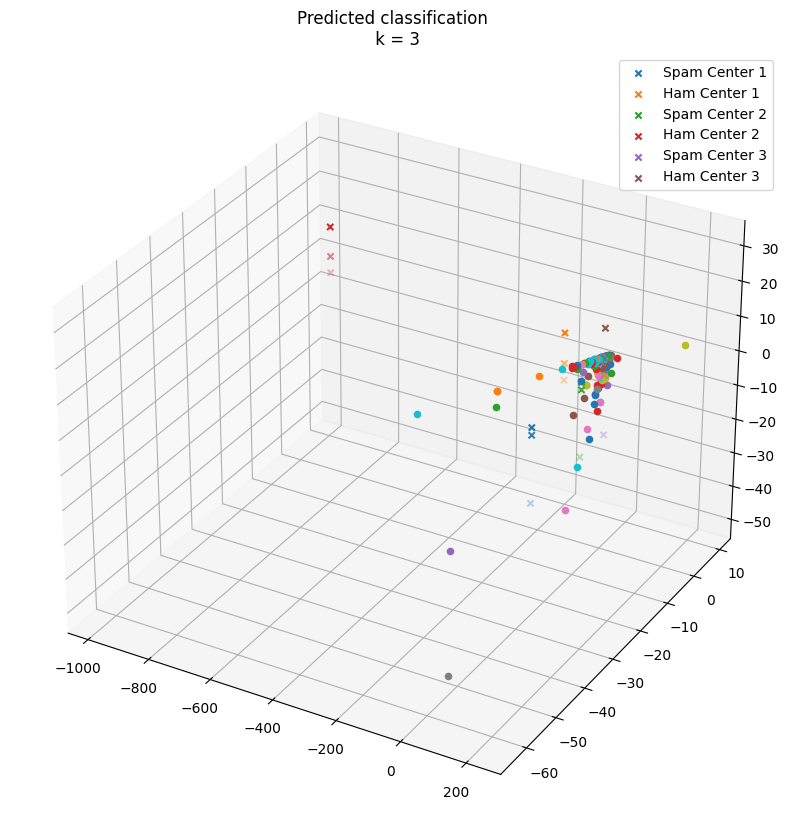

In [150]:
plt.figure()
plt.figure(figsize=(10, 10))
ax = plt.axes(projection = '3d' )

y_spam = np.where(predicted_labels == 1)
y_ham = np.where(predicted_labels == 0)

spam_points_y = y_pca[y_spam[0]]
ham_points_y = y_pca[y_ham[0]]

for i in range(best_k):
  #Plotting cluster centers 
  ax.scatter3D(centers_spam_95_final[i,0],centers_spam_95_final[i,1],centers_spam_95_final[:,2],cmap = 'Purples', marker = 'x', label = "Spam Center "+ str(i+1))
  ax.scatter3D(centers_ham_95_final[i,0],centers_ham_95_final[i,1],centers_ham_95_final[:,1],cmap = 'Greens', marker = 'x', label = "Ham Center "+ str(i+1))
  
for j in range(len(spam_points_y)):
  ax.scatter3D(spam_points_y[j,0],spam_points_y[j,1],spam_points_y[j,2], cmap = 'Purples', marker = 'o')

for n in range(len(ham_points_y)):
  ax.scatter3D(ham_points_y[n,0],ham_points_y[n,1],ham_points_y[n,2], cmap = 'Greens', marker = 'o')
  
plt.legend()
plt.title("Predicted classification \n k = " + str(best_k))
  #plt.xlim([-10,10])
  #plt.ylim([-15,15])




---



---



---



#Comments




